# gdp and hk total generated per day

Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.8e+04    907.415     19.838      0.000    1.61e+04    1.99e+04
HK GDP        -0.0008      0.000     -1.922      0.071      -0.002    7.18e-05

R-squared: 0.1703


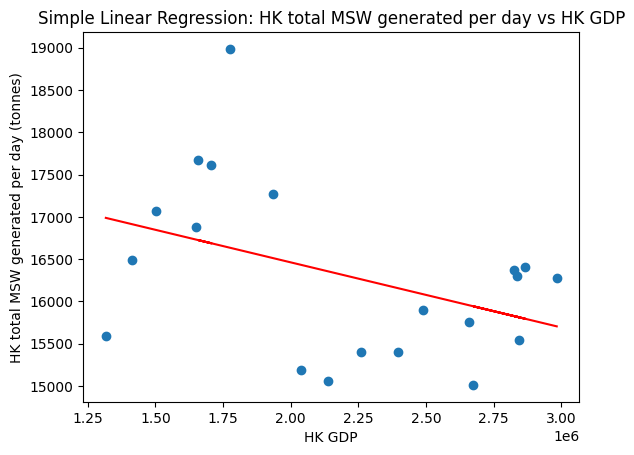

In [1]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK total MSW generated per day vs HK GDP

# Prepare data
df["HK GDP"] = pd.to_numeric(df["HK GDP"], errors="coerce")
df["HK total MSW generated (tonnes)"] = pd.to_numeric(
    df["HK total MSW generated (tonnes)"], errors="coerce"
)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Add number of days in each year (leap years: 2004, 2008, 2012, 2016, 2020, 2024)
leap_years = [2004, 2008, 2012, 2016, 2020, 2024]
df["days_in_year"] = df["Year"].apply(
    lambda y: 366 if pd.notna(y) and int(y) in leap_years else (365 if pd.notna(y) else np.nan)
)

# Compute HK total MSW generated per day (tonnes/day)
df["HK MSW generated per day (tonnes)"] = (
    df["HK total MSW generated (tonnes)"] / df["days_in_year"]
)

# Keep only rows where both variables are available
mask = (
    df["HK GDP"].notna()
    & df["HK MSW generated per day (tonnes)"].notna()
)
X_gdp = df.loc[mask, ["HK GDP"]]
y_msw_per_day = df.loc[mask, "HK MSW generated per day (tonnes)"]

# Fit model using sklearn for predictions
lin_reg_gdp = LinearRegression()
lin_reg_gdp.fit(X_gdp, y_msw_per_day)

# Fit model using statsmodels for statistical tests
X_gdp_sm = sm.add_constant(X_gdp)  # Add constant term for intercept
model_gdp = sm.OLS(y_msw_per_day, X_gdp_sm)
results_gdp = model_gdp.fit()

# Predictions for plotting
y_pred_msw_per_day = lin_reg_gdp.predict(X_gdp)

print("Model Summary:")
print(results_gdp.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results_gdp.rsquared:.4f}")

# Plot
plt.scatter(X_gdp, y_msw_per_day)
plt.plot(X_gdp, y_pred_msw_per_day, color='red')
plt.xlabel('HK GDP')
plt.ylabel('HK total MSW generated per day (tonnes)')
plt.title('Simple Linear Regression: HK total MSW generated per day vs HK GDP')
plt.show()


**GDP coefficient ($\hat \beta_1$) ≈ -0.00082 (p ≈ 0.071 > 0.05)**  

- There is **no statistically significant association at the 5% level** between Hong Kong’s GDP and the total MSW generated per day (the negative relationship is only *marginally significant at the 10% level*).  

- The **R-squared is relatively low (~0.17)**, meaning GDP explains only about **17% of the variation** in daily MSW generation; most of the variation is likely driven by other factors such as population, consumption patterns, waste policies, and residents’ waste-reduction behaviour.
